# 测量可预测性

相关论文： 
FRANCIS X. DIEBOLD and LUTZ KILIAN ： MEASURING PREDICTABILITY: THEORY AND MACROECONOMIC APPLICATIONS
Time Series Forecasting in Python

从AR(p)的近似模拟中当中预测$R^2$,该模型运用Schwartz critterion（施瓦茨准则）来选择p


In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

%matplotlib inline

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
pca_df= pd.read_csv("./data/Curve_PCA_Factor.csv", index_col=0)
pca_df['Time_Period'] = pd.to_datetime(pca_df['Time_Period'])
pca_df

,Time_Period,First,Second,Third
0,1985-01-31,10.885354,1.519641,-0.063176
1,1985-02-28,12.629734,1.676494,-0.134897
2,1985-03-29,12.028375,1.632088,-0.087229
3,1985-04-30,10.979292,1.793354,-0.131056
4,1985-05-31,8.372864,1.456465,-0.065600
...,...,...,...,...
283,2008-08-29,-6.979808,-0.084652,-0.046377
284,2008-09-30,-7.630594,0.225142,-0.167982
285,2008-10-31,-8.499589,0.764781,-0.317024
286,2008-11-28,-10.086152,0.170198,-0.036052


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

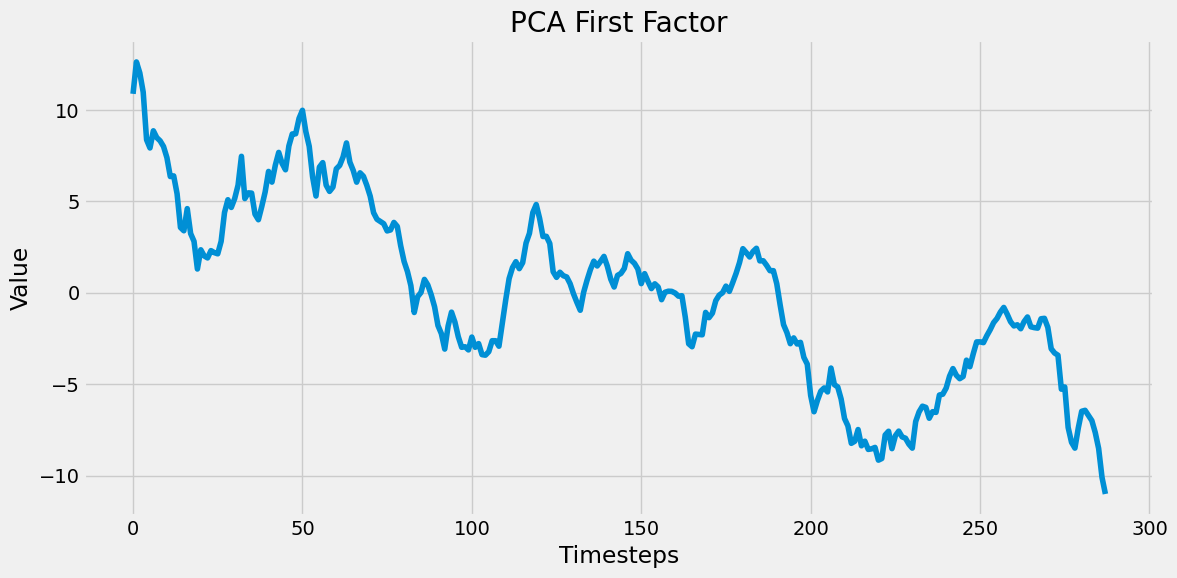

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(pca_df['First'])
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.set_title("PCA First Factor")
plt.tight_layout()

In [7]:
first_adf_result = adfuller(pca_df['First'])

print(f'ADF Statistic: {first_adf_result[0]}')
print(f'p-value: {first_adf_result[1]}')

ADF Statistic: -1.897763807757587
p-value: 0.333113816323212


The ADF statistic is not a large negative number, and with a p-value greater than 0.05, we cannot reject the null hypothesis stating that the PCA first factor time series is not stationary.


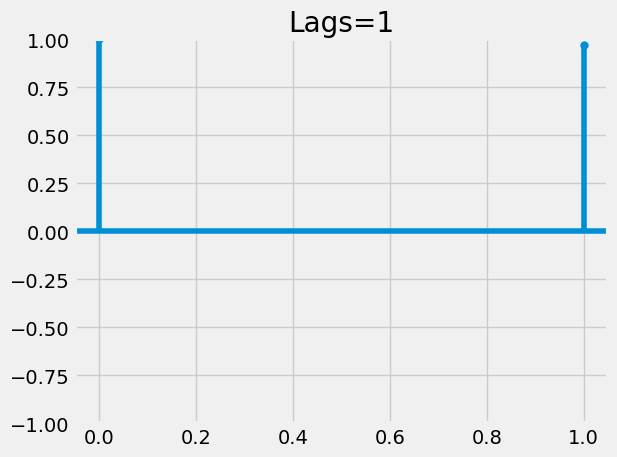

In [12]:
plot_acf(pca_df['First'], lags=1, title="Lags=1")

plt.tight_layout()

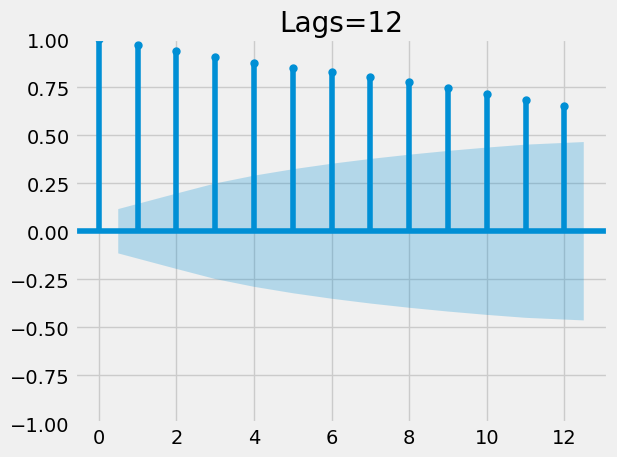

In [13]:
plot_acf(pca_df['First'], lags=12, title="Lags=12")

plt.tight_layout()

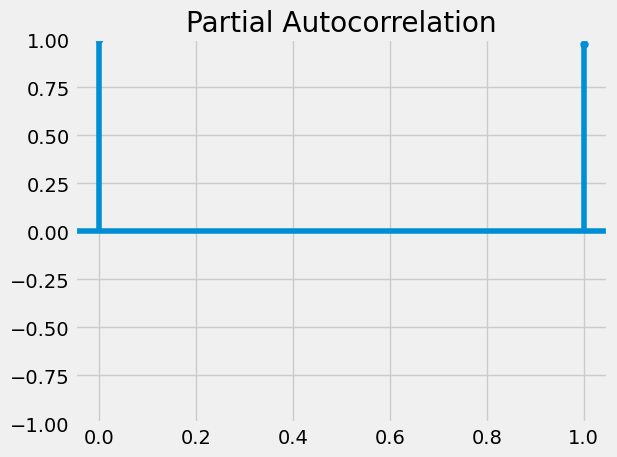

In [18]:
plot_pacf(pca_df['First'], lags=1)

plt.tight_layout()


In [20]:
second_adf_result = adfuller(pca_df['Second'])

print(f'ADF Statistic: {second_adf_result[0]}')
print(f'p-value: {second_adf_result[1]}')

ADF Statistic: -2.9245091718973795
p-value: 0.04257124816326356


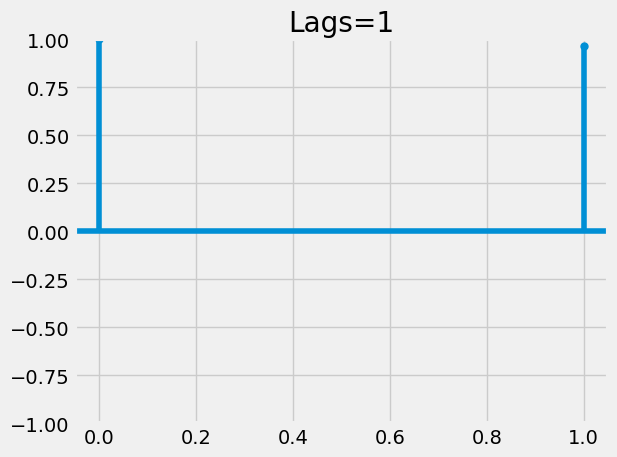

In [21]:
plot_acf(pca_df['Second'], lags=1, title="Lags=1")

plt.tight_layout()

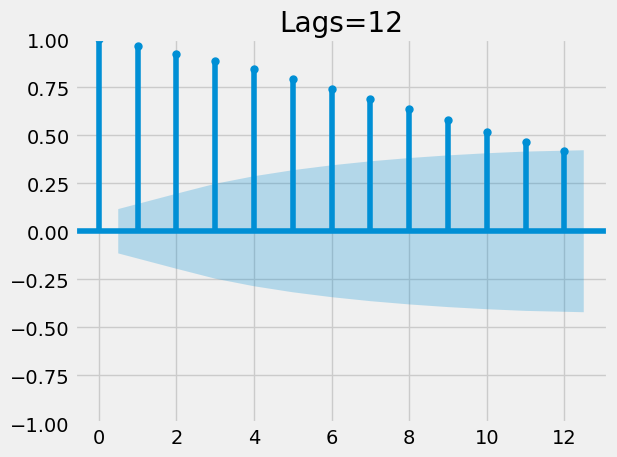

In [22]:
plot_acf(pca_df['Second'], lags=12, title="Lags=12")

plt.tight_layout()

In [23]:
third_adf_result = adfuller(pca_df['Third'])

print(f'ADF Statistic: {third_adf_result[0]}')
print(f'p-value: {third_adf_result[1]}')

ADF Statistic: -4.18793730873334
p-value: 0.0006905737033844594


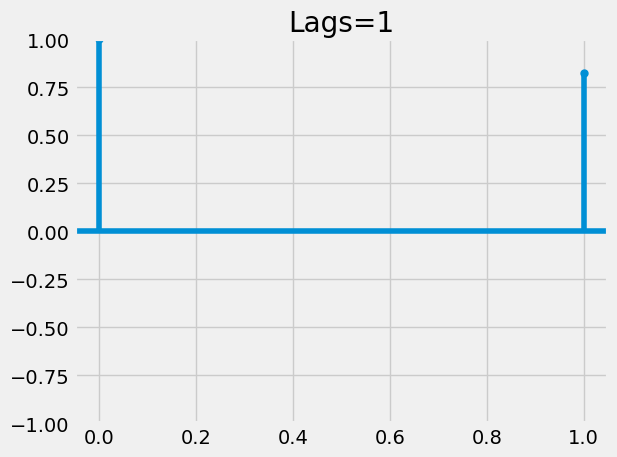

In [24]:
plot_acf(pca_df['Third'], lags=1, title="Lags=1")

plt.tight_layout()

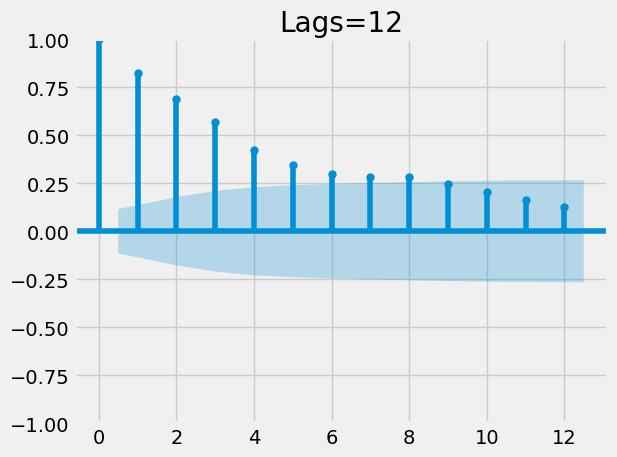

In [25]:
plot_acf(pca_df['Third'], lags=12, title="Lags=12")

plt.tight_layout()

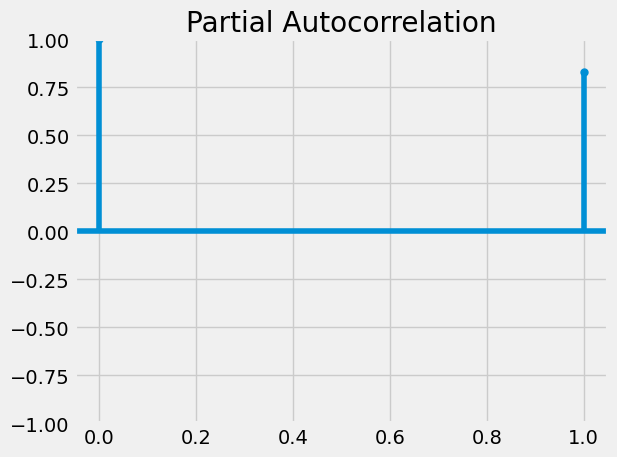

In [26]:
plot_pacf(pca_df['Third'], lags=1);

plt.tight_layout()

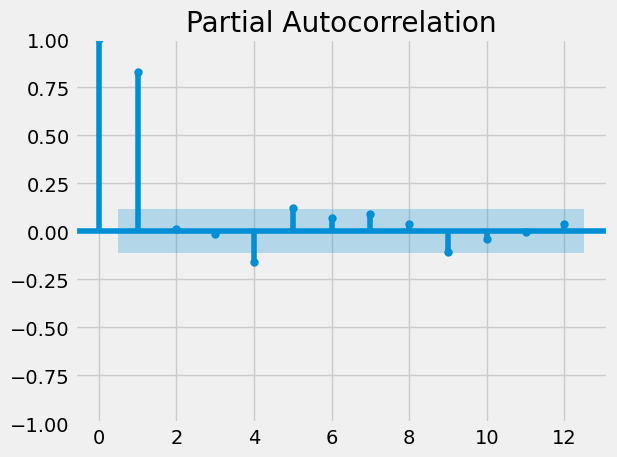

In [27]:
plot_pacf(pca_df['Third'], lags=12);

plt.tight_layout()